# Generate the data for the discussion of the Robot Dance report v. 1.0

In [1]:
import datetime
import numpy as np
import run_test

In [2]:
%%capture 

# Test configuration
max_neighbors = 3
ndays = 400
hammer_level = 0.89
min_level = 1.0
window = 14

# Compute initial values for first run and read the cities and other initial data
run_test.compute_initial_condition_and_evolve(1)
large_cities, population, initial_values, M, out = run_test.read_test_data(max_neighbors)

# force_dif is used to turn off alternation if a city has already 
# achieved herd immunity.
# TODO: this should be estimated automatically, maybe doing a simulation to see
# how long each city takes to get hear immunity if it goes isolated or something else.
ncities = len(large_cities)
force_dif = np.ones((ncities, ndays))
force_dif[:-1, 288:] = 0.0
force_dif[-1, 149:] = 0.0

target = 0.007*np.ones((ncities, ndays))
target[-1, :] = 0.015

## Tests with window 14 and start from official data

In [3]:
%%capture
hammer_duration = 0
run_test.prepare_optimization(large_cities, population, initial_values, M, out, target, window, ndays, 
                              min_level, hammer_duration, hammer_level, force_dif)

CPU times: user 21min 38s, sys: 1min 1s, total: 22min 40s
Wall time: 4min 17s


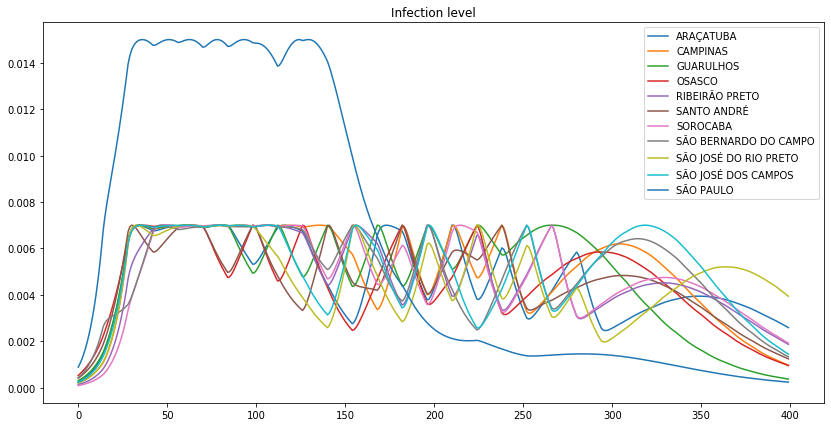

In [4]:
%%time
run_test.optimize_and_show_results("results/window_14_i.png", "results/window_14_rt.png",
                                   "results/window_14.csv", large_cities)

## Tests with window 14 and start with corrected data (12x)

In [5]:
%%capture
# Initial conditions with 12x correction
run_test.compute_initial_condition_and_evolve(12)
large_cities, population, initial_values, M, out = run_test.read_test_data(max_neighbors)
hammer_duration = 14
run_test.prepare_optimization(large_cities, population, initial_values, M, out, target, window, ndays, 
                              min_level, hammer_duration, hammer_level, force_dif)

CPU times: user 19min 24s, sys: 52.8 s, total: 20min 17s
Wall time: 4min 6s


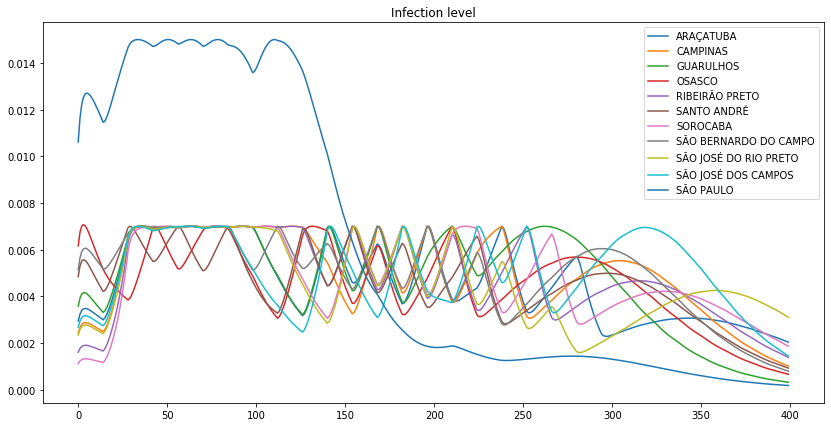

In [6]:
%%time
run_test.optimize_and_show_results("results/window_14_12x_i.png", "results/window_14_12x_rt.png", 
                                   "results/window_14_12x.csv", large_cities)

## Tests with window 14 and start from official data and using São Paulo's extra capacity

In [7]:
%%capture
# Simulate São Paulo giving UTI places to the interior.
start_date = datetime.date(2020, 4, 23)
change_date = datetime.date(2020, 8, 20)
change_index = (change_date - start_date).days
target[:-1, change_index:] *= 2.0
target[-1, change_index:] /= 2.0

run_test.compute_initial_condition_and_evolve(1)
hammer_duration = 0
large_cities, population, initial_values, M, out = run_test.read_test_data(max_neighbors)
run_test.prepare_optimization(large_cities, population, initial_values, M, out, target, window, ndays, 
                              min_level, hammer_duration, hammer_level, force_dif)

CPU times: user 33min 26s, sys: 1min 32s, total: 34min 59s
Wall time: 7min


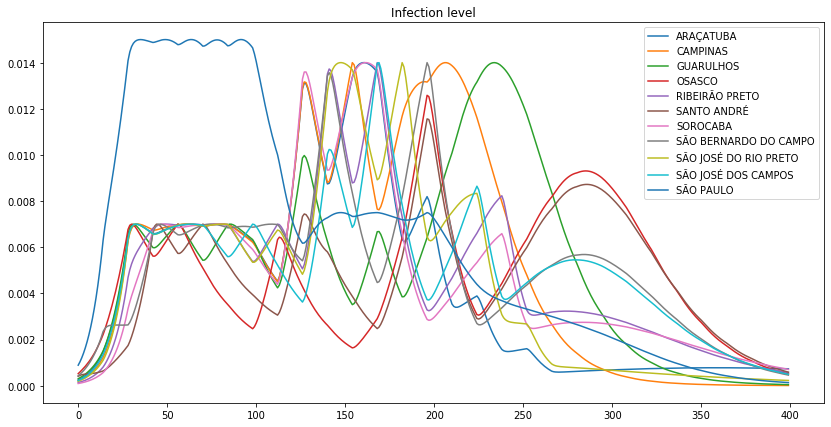

In [8]:
%%time
run_test.optimize_and_show_results("results/window_14_extra_capacity_i.png", "results/window_14_extra_capacity_rt.png", 
                                   "results/window_14_extra_capacity.csv", large_cities)

## Tests with window 14 and start using corrected data (12x) and using São Paulo's extra capacity

In [9]:
%%capture
# Initial conditions with 12x correction
run_test.compute_initial_condition_and_evolve(12)
large_cities, population, initial_values, M, out = run_test.read_test_data(max_neighbors)
hammer_duration = 14
run_test.prepare_optimization(large_cities, population, initial_values, M, out, target, window, ndays, 
                              min_level, hammer_duration, hammer_level, force_dif)

CPU times: user 38min 12s, sys: 1min 43s, total: 39min 56s
Wall time: 8min 14s


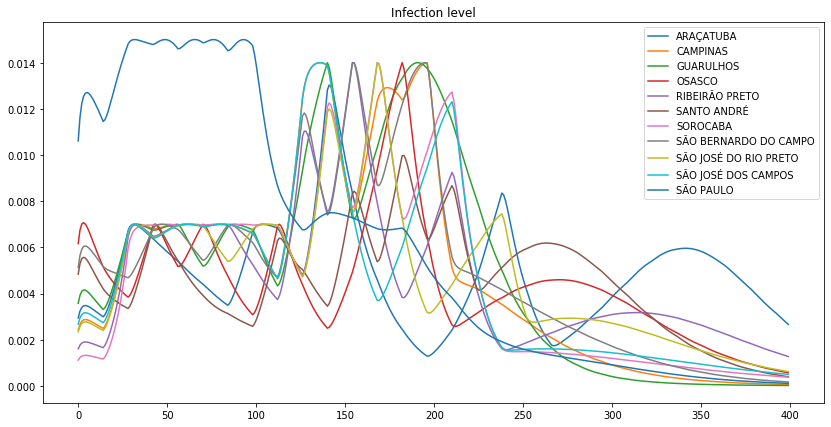

In [10]:
%%time
run_test.optimize_and_show_results("results/window_14_12x_extra_capacity_i.png", "results/window_14_12x_extra_capacity_rt.png", 
                                   "results/window_14_12x_extra_capacity.csv", large_cities)